# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00

**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь ЗАДАЧА 1***

$a_i = x_i * w $ 

$L(w,x_{i},y_{i}) =  (y_i - a_i)^2 $ 

$R(w) =  \sum_{j=1}^{D}w_j^2$

$Q(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $

$Q(w) =  \frac{1}{N}\left[\sum_{i=1}^{N}(y_i - a_i) ^ 2 \right] + \sum_{j=1}^{D}w_j^2$

$ w_{new} = w_{old} - \alpha_{k} \nabla_{w}( Q^{*}(w_{old}))$ $,\space$  $ (\alpha_{k} = \frac{\alpha_{0}}{k},\space k=1,2...)$

$\nabla_{w} Q^{*}(w_{old}) = \frac{1}{n}\sum_{j=1}^{n}(\nabla_{w}L(w_{old},x_{j},y_{j})) + \frac{2}{C}w_{old} $ $,\space$ ($n > 1$ - размер батча)

$ \nabla_{w}L(w_{old},x_{j},y_{j}) = \nabla_{w}(y_i - a_i)^2 = \nabla_{w}(x_j *w_{old}- a_i)^2 = 2(x_j *w_{old}- a_i)x_j $

$\nabla_{w} Q^{*}(w_{old}) = \frac{1}{n}\sum_{j=1}^{n}(2(x_j *w_{old}- a_i)x_j) + \frac{2}{C}w_{old} $

$ w_{new} = w_{old} - \alpha_{k} ( \frac{2}{n}\sum_{j=1}^{n}((x_j *w_{old}- a_i)x_j) +\frac{2}{C}w_{old})$ $,\space$  $ (\alpha_{k} = \frac{\alpha_{0}}{k},\space k=1,2...) $ $,\space$ ($n > 1$ - размер батча)

**Задача 2.** Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь ЗАДАЧА 2***

$a_i = \sigma((x_i *w))$

$L(w,x_{i},y_{i}) =  y_i \log a_i + ( 1 - y_i) \log (1 - a_i)  $ 

$R(w) =  \sum_{j=1}^{D}w_j^2$

$Q(w) =  - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w) $

$Q(w) =  - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}\sum_{j=1}^{D}w_j^2$

$ w_{new} = w_{old} - \alpha_{k} \nabla_{w} Q^{*}(w_{old}) $ $,\space$  $ (\alpha_{k} = \frac{\alpha_{0}}{k},\space k=1,2...) $

$\nabla_{w} Q^{*}(w_{old}) = \frac{1}{n}\sum_{j=1}^{n}(\nabla_{w}L(w_{old},x_{j},y_{j})) + \frac{2}{C}w_{old} $ $,\space$ ($n > 1$ - размер батча)

$ \nabla_{w}L(w_{old},x_{j},y_{j}) = \nabla_{w}( y_i \log a_i + ( 1 - y_i) \log (1 - a_i)) = \nabla_{w}( y_i \log (\sigma((x_i *w))) + ( 1 - y_i) \log (1 - \sigma((x_i *w)))) $

$\sigma '(t) = \sigma (t)(1-\sigma (t)) $

$ w_{new} = w_{old} - \alpha_k (\frac{1}{n} \sum\limits_{j = 1}^n [(\frac{y_j x_j}{\sigma((x_j * w_{old}))} - \frac{(1 - y_j) x_j}{1 - \sigma((x_j * w_{old}))})\sigma '_w((x_j * w_{old}))] + \frac{2}{C} w_{old} ) = w_{old} - \alpha_k (\frac{1}{n} \sum\limits_{j = 1}^n \frac{(y_j - \sigma((x_j * w_{old}))) x_j \sigma '_w((x_j * w_{old}))}{\sigma((x_j * w_{old}))(1 - \sigma((x_j * w_{old})))} + \frac{2}{C} w_{old}) = $ 

$ =w_{old} - \alpha_k ( \frac{1}{n} \sum\limits_{j = 1}^n x_j (y_j - \sigma((x_j * w_{old}))) + \frac{2}{C} w_{old} ) $

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь ЗАДАЧА 3***

1.

$w = (X^TX)^{-1}X^TY $

$\nabla_w Q(w) = 2X^T X w -2X^T y = \{w = (X^TX)^{-1}X^TY\} =  $

2.
$R(w) =  \sum_{j=1}^{D}w_j^2$

$\nabla_w R(w) = \frac{\partial(w^T I w)}{\partial w} = 2Iw $

$\frac{\partial L}{\partial w}=  2X^T X w -2X^T y $

$ \nabla_w (||Xw - y||^2 + \frac{1}{C}||w||^2) = {\nabla}_{w}(w^{T}X^{T}Xw - w^{T}X^{T}y - y^{T}Xw  + y^{T}y + \frac{1}{C}w^{T}Iw) = 2X^{T}Xw - 2X^{T}y + \frac{2}{C}Iw = 0 $

$ w = (X^{T}X + \frac{1}{C}I)^{-1}X^{T}y $

Регуляризация добавляет $\frac{1}{C}I$ и матрица становится обратимой.

**Задача 4.**  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь ЗАДАЧА 4***

$\frac{\partial E(L | x_i)}{\partial a(x_i)} = - \frac{p(y_i = 1 |x_i )}{a(x_i)} + \frac{p(y_i = 0 | x_i)}{1 - a(x_i)} = \frac{a(x_i) - p(y_i = 1 |x_i )}{a(x_i)(1 - a(x_i))} = 0 $

$ a(x_i) = p(y_i = 1 |x_i) $

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Регуляризация штрафует слишком большие веса, они плохие, так как при небольшом изменении признака, соотв. этому весу, сильно  изменится результат.

$w_0$ включать в регуляризацию не надо, так как на него не умножается никакой признак.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





In [2]:
import sklearn.utils

def batch_generator(X, y, shuffle=True, batch_size=10000):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    if shuffle:
        X, y = sklearn.utils.shuffle(X, y)
    for i in range(X.shape[0] // batch_size):
        X_batch = X[i*batch_size:(i+1)*batch_size]
        y_batch = y[i*batch_size:(i+1)*batch_size]
        yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [3]:
#%%pycodestyle


def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    ## Your code Here
    sigm_value_x = 1 / (1 + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import f1_score

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg', threshold=0.5):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        self.threshold = threshold
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        s = sigmoid(np.dot(X_batch, self.weights))
        if self.model_type == 'lin_reg':
            loss = np.sum((s - y_batch) ** 2) / X_batch.shape[0] + np.sum(self.weights[1:]**2) / self.C
        elif self.model_type == 'log_reg':
            loss = 0
            for i in range(X_batch.shape[0]):
                loss += y_batch[i] * np.log(s[i]) + (1-y_batch[i]) * np.log(1 - s[i])
            loss = -loss / X_batch.shape[0] + np.sum(self.weights[1:]**2) / self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        s = sigmoid(np.dot(X_batch, self.weights))
        if self.model_type == 'lin_reg':
            loss_grad = (np.dot(y_batch-s, X_batch) * 2/X_batch.shape[0]) + self.weights * 2/self.C
        elif self.model_type == 'log_reg':
            loss_grad = (-np.dot(y_batch-s, X_batch) / X_batch.shape[0]) + self.weights* 2/self.C 
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= new_grad * self.alpha
        #self.alpha = self.alpha_0 / k
        return self
    
    def fit(self, X, y, batch_size=1000):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) # for w_0
        self.weights = np.random.rand(X.shape[1])
        for _ in range(self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
        return self
        
    def predict(self, X, threshold=0):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1) # for w_0
        y_hat = np.zeros(shape=(len(X),1))
        
        if self.model_type == 'lin_reg':
            y_hat = np.dot(X, self.weights)
        elif self.model_type == 'log_reg':
            y_hat[np.dot(X, self.weights) >= threshold] = 1
            y_hat[np.dot(X, self.weights) < threshold] = 0
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        return y_hat
    
    def get_params(self, deep=False):
        return {
            'batch_generator':self.batch_generator,
            'C': self.C,
            'max_epoch':self.max_epoch,
            'alpha':self.alpha,
            'threshold':self.threshold,
            'model_type':self.model_type
        }
    
    def score(self, X, y):
        return f1_score(y, self.predict(X, threshold=self.threshold))

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [4]:
def plot_decision_boundary(clf):
    ## Your code Here
    print(clf.weights)
    x = range(-2, 3)
    plt.plot(x, clf.weights[0] + (clf.weights[1] * x) / clf.weights[2])

In [5]:
import sklearn.preprocessing

[0.27764547 0.25437244 0.93539417]


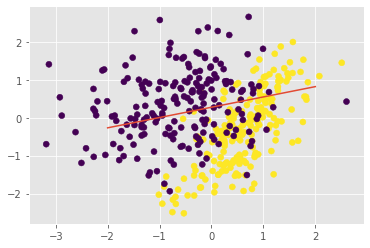

In [6]:
#lin reg

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, C=10, model_type='lin_reg', max_epoch=100, alpha=0.01)
X = sklearn.preprocessing.StandardScaler().fit_transform(X, y)
clf.fit(X, y, batch_size=10000)

plot_decision_boundary(clf)

plt.scatter(X[:,0], X[:,1], c=y)

[0.17829547 0.88220532 0.05672544]


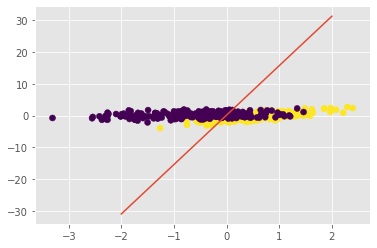

In [7]:
#log reg

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, C=10, model_type='log_reg', max_epoch=1000, alpha=0.01)
X = sklearn.preprocessing.StandardScaler().fit_transform(X, y)
clf.fit(X, y, batch_size=1000)

plot_decision_boundary(clf)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [8]:
from sklearn.datasets import make_classification

In [9]:
X, y = make_classification(n_samples=10000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)
# 100000 просто работает жутко долго

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Если альфа константа, то для лучшей сходимости альфа нужен поменьше, так как большие альфа сильнее прыгают вокруг экстремума.
Но если альфа уменьшается с итерациями, то лучше большой, т.к. он быстрее достигает экстремума.

In [10]:
X = sklearn.preprocessing.StandardScaler().fit_transform(X, y)

.
.
.
.


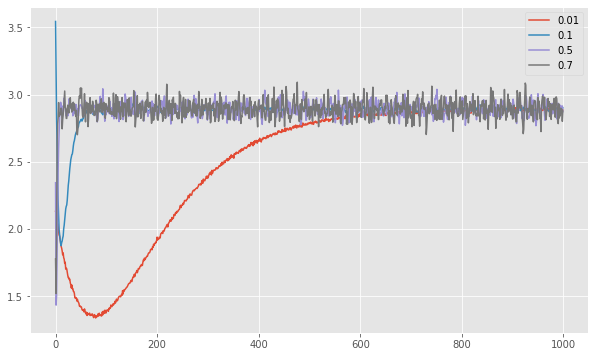

In [11]:
# lin reg
alfa = [0.01, 0.1, 0.5, 0.7]
plt.figure(figsize=(10, 6))
for alpha in alfa:
    print('.')
    loss = []
    epochs = 100
    clf = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=epochs, C=2, model_type='lin_reg')
    clf.fit(X, y, batch_size=1000)     
    loss.append(clf.errors_log['loss'])
    loss = np.array(loss)[0]
    loss.reshape(-1, epochs)
    
    graphs = []
    for i in range(loss.shape[0]):
        graphs.append(np.mean(loss[i]))
    plt.plot(graphs)
plt.legend(alfa)

.
.
.
.


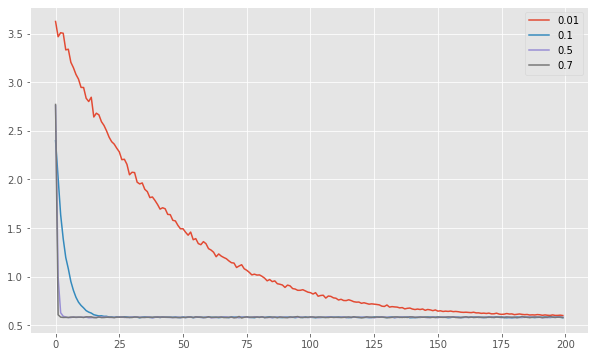

In [12]:
# log reg
alfa = [0.01, 0.1, 0.5, 0.7]
plt.figure(figsize=(10, 6))
for alpha in alfa:
    print('.')
    loss = []
    epochs = 20
    clf = MySGDClassifier(batch_generator, alpha=alpha, max_epoch=epochs, C=2, model_type='log_reg')
    clf.fit(X, y, batch_size=1000)     
    loss.append(clf.errors_log['loss'])
    loss = np.array(loss)[0]
    loss.reshape(-1, epochs)
    
    graphs=[]
    for i in range(loss.shape[0]):
        graphs.append(np.mean(loss[i]))
    plt.plot(graphs)
plt.legend(alfa)

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 


c =    1000.0
mean = 0.4627954631972099

c =    215.44346900318845
mean = 0.4018923178645156

c =    46.4158883361278
mean = 0.28186136502993964

c =    10.0
mean = 0.24756682851799236

c =    2.1544346900318843
mean = 0.1764143830096968

c =    0.4641588833612782
mean = 0.023442526537068565

c =    0.1
mean = 0.004334395954050327

c =    0.021544346900318867
mean = 0.001063027076192235

c =    0.004641588833612782


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


mean = 6.242937018691829e+51

c =    0.001
mean = 3.8483895711474276e+127


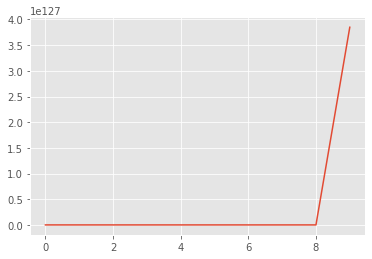

In [13]:
mean_weights = []
for c in np.logspace(3, -3, 10):
    print('\nc =   ', c)
    clf = MySGDClassifier(batch_generator, C=c, alpha=0.01, max_epoch=10, model_type='log_reg')
    clf.fit(X, y, batch_size=1000)
    print('mean =', np.nanmean(np.abs(clf.weights)))
    mean_weights.append(np.nanmean(np.abs(clf.weights)))
plt.plot(mean_weights)


c =    1000.0
mean = 117.99500612509709

c =    215.44346900318845
mean = 39.69519875210582

c =    46.4158883361278
mean = 8.626858298049271

c =    10.0
mean = 1.8634102578269636

c =    2.1544346900318843
mean = 0.38800856874271544

c =    0.4641588833612782
mean = 6.3466087217157616e+60

c =    0.1


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in double_scalars
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:45: RuntimeWarning: overflow encountered in square
H:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in true_divide
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


mean = nan

c =    0.021544346900318867
mean = nan

c =    0.004641588833612782
mean = nan

c =    0.001
mean = nan


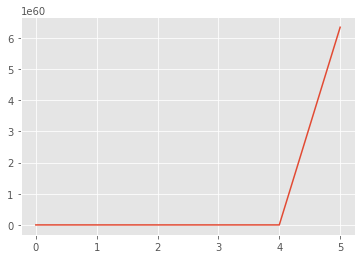

In [14]:
mean_weights = []
for c in np.logspace(3, -3, 10):
    print('\nc =   ', c)
    clf = MySGDClassifier(batch_generator, C=c, alpha=0.5, max_epoch=100, model_type='lin_reg')
    clf.fit(X, y, batch_size=1000)
    print('mean =', np.nanmean(np.abs(clf.weights)))
    mean_weights.append(np.nanmean(np.abs(clf.weights)))
plt.plot(mean_weights)

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

До некоторых пор хорошо понижалось, ставлю лайк

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [36]:
pd.read_csv('docs_titles.tsv', sep='\t', encoding='utf-8', lineterminator='\n').head(10)

,doc_id,title
0,15731,ВАЗ 21213 | Замена подшипников ступицы | Нива
1,14829,"Ваз 2107 оптом в Сочи. Сравнить цены, купить п..."
2,15764,Купить ступица Лада калина2. Трансмиссия - пер...
3,17669,Классика 21010 - 21074
4,14852,Ступица Нива — замена подшипника своими руками
5,15458,ВАЗ 2110
6,14899,"Обзор подшипников полуоси ВАЗ 2101-07, 2121,2123"
7,16879,Купить Подшипники и ступицы FAG (Страница 23)
8,16310,HorsePowers — автомобильный интернет портал » ...
9,15440,Новости и сообщения из официальной группы Вкон...


In [37]:
doc_to_title = {}
with open('docs_titles.tsv', encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [38]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv', encoding='utf-8')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [39]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


In [40]:
groups_train

array([  1,   1,   1, ..., 129, 129, 129], dtype=int64)

Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [41]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [42]:
X_train = StandardScaler().fit_transform(X_train, y_train)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [43]:
from sklearn.model_selection import train_test_split

In [23]:
X_train = StandardScaler().fit_transform(X_train, y_train)
X_trainq, X_testq, y_trainq, y_testq = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train)

In [68]:
X_trainq, X_testq, y_trainq, y_testq = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train)

clf = MySGDClassifier(batch_generator, C=5, model_type='log_reg', max_epoch=10, alpha=0.01, threshold=0.3)
%time clf.fit(X_trainq, y_trainq, batch_size=500)

print('MY SCORE = ',clf.score(X_testq, y_testq))

X_trainq, X_testq, y_trainq, y_testq = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train)


defclf = LinearRegression(copy_X=True)
%time defclf.fit(X_trainq, y_trainq)

print('not MY SCORE = ', defclf.score(X_testq, y_testq))


Wall time: 5.56 s
MY SCORE =  0.6013157894736842
Wall time: 11 ms
not MY SCORE =  0.23863653252093564


***ПАРАМЕТРЫ УЗНАЮ В САМОМ НИЗУ***

порог=0.3

эпох=10

с=5

альфа=0.01

батч=500

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [69]:
X_train, y_train = sklearn.utils.shuffle(X_train, y_train)

In [70]:
clf = MySGDClassifier(batch_generator, C=5, model_type='log_reg', max_epoch=10, alpha=0.01, threshold=0.3)
clf.fit(X_train, y_train, batch_size=500)

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


MySGDClassifier(C=5, alpha=0.01,
                batch_generator=<function batch_generator at 0x00000000051C5D90>,
                max_epoch=10, model_type='log_reg', threshold=0.3)

In [71]:
import pandas as pd
test_data = pd.read_csv('test_groups.csv', encoding='utf-8')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title, target))

In [72]:
import numpy as np
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [73]:
ans = np.asarray(clf.predict(X_test), dtype=int)
print(len(ans))
#np.savetxt("foo.csv", ans, delimiter=",")
pairid = pd.DataFrame(np.array(range(11691,28318)))
targ = pd.DataFrame(ans)
pd.concat([pairid, targ], axis=1).to_csv("file.csv", index=False) #названия столбцов через блокнот++ поставил

16627


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

**При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн.**

https://www.kaggle.com/piterkindmitry

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***

всё чётко

правда можно больше домашки, но каждая более маленькой, чтобы держаться в тонусе и не умирать, когда подступает дедлайн, а ты не начинал

хотя это просто я бездельник(

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
#clf = MySGDClassifier(batch_generator, C=2, model_type='log_reg', max_epoch=100, alpha=0.5)
X_trainq, X_testq, y_trainq, y_testq = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, stratify=y_train)
params = {'batch_generator':[batch_generator],
          'C':[1, 2, 5, 10, 20],
          'alpha':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7],
          'max_epoch':[10, 20, 30, 50, 100],
          'threshold':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
          'model_type':['log_reg', 'lin_reg']
         }
search = GridSearchCV(MySGDClassifier, params)
search.fit(X_trainq, y_trainq)

H:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


TypeError: Cannot clone object '<class '__main__.MySGDClassifier'>' (type <class 'type'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

Есть же get_params(deep=False), чего он хочет??

In [46]:
params = {'batch_size':[100, 500, 1000],
          'C':[1, 2, 5, 10, 20],
          'alpha':[0.01, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7],
          'max_epoch':[10, 20, 30, 50, 100],
          'threshold':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
          'model_type':['log_reg', 'lin_reg']
         }

best = 0

for max_epoch in params['max_epoch']:
    for batch_size in params['batch_size']:
        for c in params['C']:
            for alpha in params['alpha']:
                for threshold in params['threshold']:
                    X_trainq, X_testq, y_trainq, y_testq = train_test_split(X_train, y_train,
                                                                            test_size=0.2, shuffle=True, stratify=y_train)

                    clf = MySGDClassifier(batch_generator, C=c, model_type='log_reg',
                                          max_epoch=max_epoch, alpha=alpha, threshold=threshold)
                    clf.fit(X_trainq, y_trainq, batch_size=batch_size)
                    score = clf.score(X_testq, y_testq)
                    if score > best:
                        print('NEW BEST SCORE = ', score)
                        print(threshold, max_epoch, c, alpha, batch_size)
                        best = score
                        bestparams['threshold'] = threshold
                        bestparams['max_epoch'] = max_epoch
                        bestparams['C'] = c
                        bestparams['alpha'] = alpha
                        bestparams['batch_size'] = batch_size
print('BEST SCORE =', best)
print(bestparams)

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


NEW BEST SCORE =  0.5993788819875776
0.1 10 1 0.01 100
NEW BEST SCORE =  0.6025316455696202
0.2 10 1 0.01 100


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


NEW BEST SCORE =  0.6153846153846155
0.1 10 1 0.05 100
NEW BEST SCORE =  0.6244343891402715
0.1 10 1 0.1 100


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply


NEW BEST SCORE =  0.6276747503566333
0.1 10 1 0.5 100


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site

NEW BEST SCORE =  0.6313588850174217
0.9 10 1 0.7 100


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site

NEW BEST SCORE =  0.636830520909758
0.1 10 1 0.3 500


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site

NEW BEST SCORE =  0.6409214092140921
0.3 10 5 0.01 500


H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packa

H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in multiply
H:\Anaconda3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log
H:\Anaconda3\lib\site

KeyboardInterrupt: 

0.3 10 5 0.01 500

Мне надоело сидеть, там уже пошли большие эпохи просто